In [1]:
from crackest.cracks import CrackPy

cp=CrackPy(model=0)


/Users/richarddvorak/Documents/GitHub/CrackPy/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


AttributeError: 'CrackAnalyzer' object has no attribute 'mm_ratio_set'

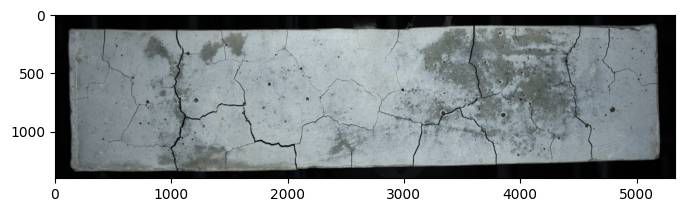

In [8]:
cp.get_mask(impath=r"../../Img/ID14_940_Image.png")
cp.distancemap()

In [3]:
cp.preview(mask="crack")

AttributeError: 'CrackPy' object has no attribute 'preview'

In [5]:
metrics=cp.get_metrics()

In [6]:
print(metrics)

{'edge_per_node': np.float64(1.404332129963899), 'crack_tot_length': np.float64(21458.804283406607), 'average_angle': np.float64(90.55129087862866), 'spec_area': (np.uint64(6026406),), 'mat_area': (np.uint64(1209649),), 'crack_ratio': (np.float64(0.03178677307834885),), 'crack_length': (np.int64(21435),), 'crack_thickness': (np.float64(8.936785630977374),), 'pore_area': (np.uint64(45045),), 'avg_pore_distance': np.float64(1929.4754536324854), 'avg_pore_size': np.float64(114.96969696969697)}


In [1]:
from crackest.crack_analyzer import CrackAn

ca=CrackAn()
ca.input(file=r"../../Img/Multiple_specimens.png")
ca.registr()

/Users/richarddvorak/Documents/GitHub/CrackPy/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,bbox,sbbox,angle,area,x0,y0,subspec,eq,sett,ratio,cover
0,"[188, 488, 1495, 5252]","[11, 1292, 0, 4748]",178.694452,5601607.0,2853.247211,843.581982,"{'img': [[[3 2 3], [3 2 2], [3 2 2], [3 2 2], ...","{'h': {'alpha': -43.87877711969929, 'beta': 12...","{'ID': 1, 'angle': -178.69445169612794, 'label...",0,1.000000
1,"[2115, 511, 3353, 5223]","[11, 1237, 0, 4698]",0.397575,5591983.0,2837.599583,2738.573780,"{'img': [[[3 3 4], [3 3 4], [3 3 4], [3 3 4], ...","{'h': {'alpha': 144.11097979061617, 'beta': -4...","{'ID': 2, 'angle': -0.39757456375200206, 'labe...",0,0.998282


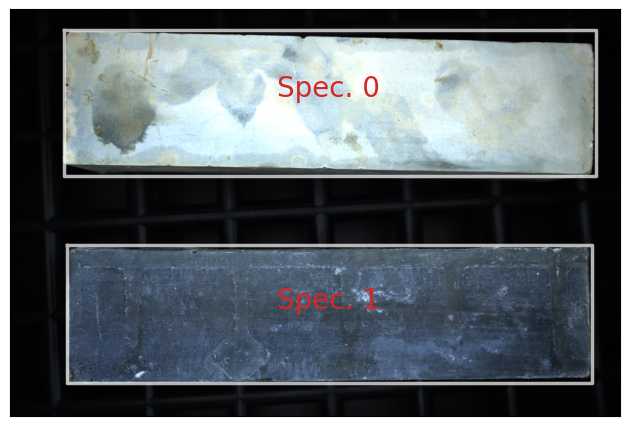

In [2]:
ca.preview()

In [5]:
spec=ca.get_spec(specid=0)
spec.get_countours()

test


UnboundLocalError: cannot access local variable 'count' where it is not associated with a value

test


NameError: name 'count' is not defined

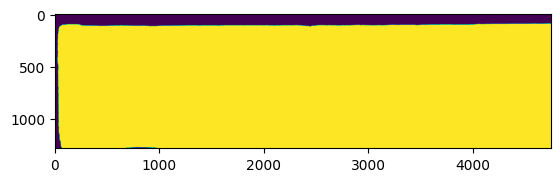

In [8]:
import numpy as np
import cv2
from skimage import measure
import matplotlib.pyplot as plt

r = spec.masks["back"]
r = (~r).astype(np.uint8)
print("test")
total_area = r.shape[0] * r.shape[1]
area_trsh = int(total_area * 0.3)

kernel = np.ones((20, 20), np.uint8)
r = cv2.erode(r, kernel)
r = cv2.dilate(r, kernel, iterations=1)

plt.imshow(r)
contours = measure.find_contours(r, 0.8)

area = 0
for i in range(len(contours)):
    count = contours[i]
    c = np.expand_dims(count.astype(np.float32), 1)
    c = cv2.UMat(c)
    area = cv2.contourArea(c)
    if area > area_trsh:
        break

image_height, image_width = (
    r.shape[0],
    r.shape[1],
)  # Replace with your actual image size
mask = np.zeros((image_height, image_width), dtype=np.uint8)

# Fill the area inside the contour with 1
cv2.fillPoly(mask, [count], color=1)

specimen_mask = mask
area_treashold = area_trsh
area = area
contour = count